In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

In [2]:
magpie_representation=pd.read_csv("magpie.csv")

In [3]:
df=pd.read_csv("all_data_git.csv")

# Exploratory Data Analysis: 
    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4964 non-null   int64  
 1   name        4964 non-null   object 
 2   delta_e     4964 non-null   float64
 3   ntypes      4964 non-null   int64  
 4   volume      4964 non-null   float64
 5   A           4964 non-null   object 
 6   nA          4964 non-null   int64  
 7   B           4609 non-null   object 
 8   nB          4964 non-null   int64  
 9   H           4964 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 387.9+ KB


In [5]:
df.head()

,Unnamed: 0,name,delta_e,ntypes,volume,A,nA,B,nB,H
0,0,Ti20H2N17,-1.743870,3,379.154163,Ti,20,N,17,2
1,1,CaH3Pd,-0.514892,3,50.929335,Ca,1,Pd,1,3
2,2,BeH2,-0.166498,2,140.319142,Be,1,NaN,0,2
3,3,SmH2,-0.767608,2,38.864183,Sm,1,NaN,0,2
4,4,As3(HO2)5,-1.459528,3,185.324892,As,3,O,10,5


In [6]:
df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [7]:
df.head()

,name,delta_e,ntypes,volume,A,nA,B,nB,H
0,Ti20H2N17,-1.743870,3,379.154163,Ti,20,N,17,2
1,CaH3Pd,-0.514892,3,50.929335,Ca,1,Pd,1,3
2,BeH2,-0.166498,2,140.319142,Be,1,NaN,0,2
3,SmH2,-0.767608,2,38.864183,Sm,1,NaN,0,2
4,As3(HO2)5,-1.459528,3,185.324892,As,3,O,10,5


In [8]:
df.shape

(4964, 9)

In [9]:
df.describe()

,delta_e,ntypes,volume,nA,nB,H
count,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000
mean,-0.810642,2.928485,165.276711,2.310234,2.327961,4.843272
std,0.705234,0.257709,179.992344,3.201609,3.353271,6.502965
min,-3.084604,2.000000,11.174200,1.000000,0.000000,1.000000
25%,-1.324646,3.000000,69.597200,1.000000,1.000000,1.000000
50%,-0.527455,3.000000,108.785000,1.000000,1.000000,3.000000
75%,-0.264467,3.000000,184.253000,2.000000,2.000000,6.000000
max,-0.000175,3.000000,3445.685549,48.000000,48.000000,96.000000


In [10]:
df.describe(include='object')

,name,A,B
count,4964,4964,4609
unique,2406,81,77
top,Ca1H2O2,B,O
freq,63,340,1239


In [11]:
df[df.duplicated()]

,name,delta_e,ntypes,volume,A,nA,B,nB,H
476,H1Li1,-0.409184,2,15.9527,Li,1,NaN,0,1
477,H1Li1,-0.409184,2,15.9527,Li,1,NaN,0,1
480,H1Li1,-0.409184,2,15.9527,Li,1,NaN,0,1
493,H1Li1,-0.409184,2,15.9525,Li,1,NaN,0,1
546,H2Zr1,-0.550020,2,27.5890,Zr,1,NaN,0,2
...,...,...,...,...,...,...,...,...,...
4957,K3YbH5,-0.163861,3,349.7210,K,3,Yb,1,5
4959,Cs3YbH5,-0.187486,3,465.2840,Cs,3,Yb,1,5
4960,K2YbH4,-0.310628,3,133.4940,K,2,Yb,1,4
4961,KZnH3,-0.061055,3,326.2800,K,1,Zn,1,3


In [12]:
two=np.array(df.ntypes==2).sum()
three=np.array(df.ntypes==3).sum()

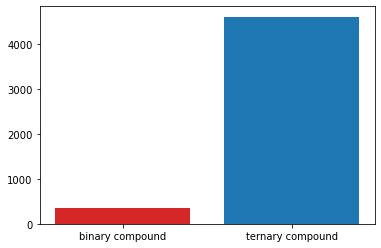

In [13]:
fig, ax = plt.subplots()

compound = ['binary compound', 'ternary compound']
counts = [two, three]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(compound, counts, label=bar_labels, color=bar_colors)

plt.show()


In [14]:
c=list(df.ntypes.unique())


## Preprocessing 


In [15]:
x=1.44551
y=1.44572
if f"{x:.3f}"==f"{y:.3f}":
    print("ok")

ok


In [16]:
def Remove__duplicated_materials(ds):
    op=True
    op1=op
    i=0
    while op:
        if i <len(ds.index):
            name=ds["name"][i]
            x=ds["delta_e"][i]
            j=i+1
            op1=True

            while op1:
                if j<len(ds.index):
                    name1=ds["name"][j]
                    x1=ds["delta_e"][j]
                    if ((name==name1) and (f'{x:.1f}'==f'{x1:.1f}')):
                        ds.drop(ds.index[j],axis=0,inplace=True)
                        ds.index=[ind for ind in range( len(ds.index))] 
                    j+=1   
                if j+2>=len(ds.index):
                    op1=False



        if i+2>=len(ds.index):
            op=False

        i+=1
    return ds

In [17]:
df=Remove__duplicated_materials(df)


In [18]:
df

,name,delta_e,ntypes,volume,A,nA,B,nB,H
0,Ti20H2N17,-1.743870,3,379.154163,Ti,20,N,17,2
1,CaH3Pd,-0.514892,3,50.929335,Ca,1,Pd,1,3
2,BeH2,-0.166498,2,140.319142,Be,1,NaN,0,2
3,SmH2,-0.767608,2,38.864183,Sm,1,NaN,0,2
4,As3(HO2)5,-1.459528,3,185.324892,As,3,O,10,5
...,...,...,...,...,...,...,...,...,...
2846,SrYbH4,-0.453794,3,161.089000,Sr,1,Yb,1,4
2847,YbH2,-0.556308,2,151.590000,Yb,1,NaN,0,2
2848,Rb3YbH5,-0.160148,3,396.541000,Rb,3,Yb,1,5
2849,RbZnH3,-0.063820,3,374.449000,Rb,1,Zn,1,3


In [19]:
df.describe(include='object')

,name,A,B
count,2851,2851,2603
unique,2406,81,77
top,PrHSe,K,O
freq,10,162,532


As  we can see in B column there is 3238 from in 3585  which mean the absent of therd chemical element


### The initial preprocessing step involves encoding the categorical variable, which in our case are the chemical elements. Numerous encoding methods are available, and we have opted for the Magpie representation for specific reasons outlined in the report (master thesis)..   

In [20]:
magpie_representation.head()

,element,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,Row,CovalentRadius,Electronegativity,NsValence,...,NValence,NsUnfilled,NpUnfilled,NdUnfilled,NfUnfilled,NUnfilled,GSvolume_pa,GSbandgap,GSmagmom,SpaceGroupNumber
0,H,1.0,92.0,1.007940,14.01,1.0,1.0,31.0,2.20,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,6.615000,7.853,0.0,194.0
1,He,2.0,98.0,4.002602,1211.40,18.0,1.0,28.0,1.63,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,12.305000,18.098,0.0,225.0
2,Li,3.0,1.0,6.941000,453.69,1.0,2.0,128.0,0.98,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,16.593333,0.000,0.0,229.0
3,Be,4.0,67.0,9.012182,1560.00,2.0,2.0,96.0,1.57,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,7.890000,0.000,0.0,194.0
4,B,5.0,72.0,10.811000,2348.00,13.0,2.0,84.0,2.04,2.0,...,3.0,0.0,5.0,0.0,0.0,5.0,7.172500,1.524,0.0,166.0


### it's evident that several features exhibit limited variability, which might not be suitable for our model. The question arises: why should we incorporate variables that lack variability? To address this concern, we intend to employ an estimator that selects features based on their variance 

In [21]:
magpie_representation.var()

/tmp/ipykernel_12718/1426814439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  magpie_representation.var()


Number                  792.166667
MendeleevNumber         932.796821
AtomicWeight           5421.024466
MeltingT             804953.710963
Column                   33.957045
Row                       2.380369
CovalentRadius         1943.338488
Electronegativity         0.395570
NsValence                 0.173540
NpValence                 3.555627
NdValence                18.218857
NfValence                31.354811
NValence                 62.913230
NsUnfilled                0.139175
NpUnfilled                2.260524
NdUnfilled               11.260095
NfUnfilled               10.811856
NUnfilled                23.064863
GSvolume_pa             281.024920
GSbandgap                 7.826277
GSmagmom                  0.076005
SpaceGroupNumber       3768.521478
dtype: float64

In [22]:
Selector=VarianceThreshold(threshold=4)

In [23]:
Selector.fit_transform(magpie_representation.loc[:,"Number":])

array([[  1.        ,  92.        ,   1.00794   , ...,   6.615     ,
          7.853     , 194.        ],
       [  2.        ,  98.        ,   4.002602  , ...,  12.305     ,
         18.098     , 225.        ],
       [  3.        ,   1.        ,   6.941     , ...,  16.59333333,
          0.        , 229.        ],
       ...,
       [ 95.        ,  26.        , 243.        , ...,  18.08      ,
          0.        , 194.        ],
       [ 96.        ,  28.        , 247.        , ...,  18.08      ,
          0.        , 194.        ],
       [ 97.        ,  30.        , 247.        , ...,  18.08      ,
          0.        , 194.        ]])

In [24]:
Selector.get_support() #  The column selcted are the Corresponding to True

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True])

In [25]:
# mask to see waht are the name of the columns selected
list_columns=list(np.array(magpie_representation.loc[:,"Number":].columns)[Selector.get_support()])

In [26]:
list_columns.insert(0,"element")

In [27]:
magpie_representation_var=magpie_representation[list_columns]

In [28]:
magpie_representation_var.head()

,element,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,CovalentRadius,NdValence,NfValence,NValence,NdUnfilled,NfUnfilled,NUnfilled,GSvolume_pa,GSbandgap,SpaceGroupNumber
0,H,1.0,92.0,1.007940,14.01,1.0,31.0,0.0,0.0,1.0,0.0,0.0,1.0,6.615000,7.853,194.0
1,He,2.0,98.0,4.002602,1211.40,18.0,28.0,0.0,0.0,2.0,0.0,0.0,0.0,12.305000,18.098,225.0
2,Li,3.0,1.0,6.941000,453.69,1.0,128.0,0.0,0.0,1.0,0.0,0.0,1.0,16.593333,0.000,229.0
3,Be,4.0,67.0,9.012182,1560.00,2.0,96.0,0.0,0.0,2.0,0.0,0.0,0.0,7.890000,0.000,194.0
4,B,5.0,72.0,10.811000,2348.00,13.0,84.0,0.0,0.0,3.0,0.0,0.0,5.0,7.172500,1.524,166.0


In [29]:
magpie_representation_var

,element,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,CovalentRadius,NdValence,NfValence,NValence,NdUnfilled,NfUnfilled,NUnfilled,GSvolume_pa,GSbandgap,SpaceGroupNumber
0,H,1.0,92.0,1.007940,14.01,1.0,31.0,0.0,0.0,1.0,0.0,0.0,1.0,6.615000,7.853,194.0
1,He,2.0,98.0,4.002602,1211.40,18.0,28.0,0.0,0.0,2.0,0.0,0.0,0.0,12.305000,18.098,225.0
2,Li,3.0,1.0,6.941000,453.69,1.0,128.0,0.0,0.0,1.0,0.0,0.0,1.0,16.593333,0.000,229.0
3,Be,4.0,67.0,9.012182,1560.00,2.0,96.0,0.0,0.0,2.0,0.0,0.0,0.0,7.890000,0.000,194.0
4,B,5.0,72.0,10.811000,2348.00,13.0,84.0,0.0,0.0,3.0,0.0,0.0,5.0,7.172500,1.524,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Np,93.0,22.0,237.000000,917.00,3.0,190.0,1.0,4.0,7.0,9.0,10.0,19.0,18.453750,0.000,62.0
93,Pu,94.0,24.0,244.000000,913.00,3.0,187.0,0.0,6.0,8.0,0.0,8.0,8.0,18.080000,0.000,11.0
94,Am,95.0,26.0,243.000000,1449.00,3.0,180.0,0.0,7.0,9.0,0.0,7.0,7.0,18.080000,0.000,194.0
95,Cm,96.0,28.0,247.000000,1618.00,3.0,169.0,1.0,7.0,10.0,9.0,7.0,16.0,18.080000,0.000,194.0


In [30]:
#This function serves to represent each chemical element (both in column A and column B) within our dataset
#using the Magpie representation. It returns a data frame that is organized based on the order of columns in the original data.
def more_features(df,chemical_column,magpie):
    column=list(magpie.columns)
    zero=[0]*len(column)
    dic={}
    for k,v in zip(column,zero):
        dic[k]=v
    no_elem=pd.DataFrame(dic,index=[0])
    for i in range (len(df)):
        element=df[chemical_column][i]
        list_elem=list(magpie["element"])
        if element in list_elem:
            ind=list_elem.index(element)
            el0=magpie[ind:ind+1]
        else :
            el0=no_elem
        if i>0:
            el1=pd.concat([el1,el0])           
        if i<1:
            el1=el0  
    return el1

In [31]:
# is  the   data  
representation_of_A=more_features(df,'A',magpie_representation_var)
representation_of_B=more_features(df,'B',magpie_representation_var)

In [32]:
representation_of_A

,element,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,CovalentRadius,NdValence,NfValence,NValence,NdUnfilled,NfUnfilled,NUnfilled,GSvolume_pa,GSbandgap,SpaceGroupNumber
21,Ti,22.0,43.0,47.867000,1941.00,4.0,160.0,2.0,0.0,4.0,8.0,0.0,8.0,16.690000,0.0,194.0
19,Ca,20.0,7.0,40.078000,1115.00,2.0,176.0,0.0,0.0,2.0,0.0,0.0,0.0,37.770000,0.0,225.0
3,Be,4.0,67.0,9.012182,1560.00,2.0,96.0,0.0,0.0,2.0,0.0,0.0,0.0,7.890000,0.0,194.0
61,Sm,62.0,23.0,150.360000,1345.00,3.0,198.0,0.0,6.0,8.0,0.0,8.0,8.0,33.230000,0.0,166.0
32,As,33.0,84.0,74.921600,1090.00,15.0,119.0,10.0,0.0,15.0,0.0,0.0,3.0,22.175000,0.0,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Sr,38.0,8.0,87.620000,1050.00,2.0,195.0,0.0,0.0,2.0,0.0,0.0,0.0,54.230000,0.0,225.0
69,Yb,70.0,39.0,173.054000,1092.00,3.0,187.0,0.0,14.0,16.0,0.0,0.0,0.0,34.120000,0.0,225.0
36,Rb,37.0,4.0,85.467800,312.46,1.0,220.0,0.0,0.0,1.0,0.0,0.0,1.0,90.722500,0.0,229.0
36,Rb,37.0,4.0,85.467800,312.46,1.0,220.0,0.0,0.0,1.0,0.0,0.0,1.0,90.722500,0.0,229.0


In [33]:
col_o=list(representation_of_B.columns)
col_n=list(representation_of_B.columns)
for i in range (len(col_n)):
     col_n[i]=col_n[i]+'1'

In [34]:
dict_new_name={old:new for old,new  in zip(col_o,col_n)}

In [35]:
dict_new_name

{'element': 'element1',
 'Number': 'Number1',
 'MendeleevNumber': 'MendeleevNumber1',
 'AtomicWeight': 'AtomicWeight1',
 'MeltingT': 'MeltingT1',
 'Column': 'Column1',
 'CovalentRadius': 'CovalentRadius1',
 'NdValence': 'NdValence1',
 'NfValence': 'NfValence1',
 'NValence': 'NValence1',
 'NdUnfilled': 'NdUnfilled1',
 'NfUnfilled': 'NfUnfilled1',
 'NUnfilled': 'NUnfilled1',
 'GSvolume_pa': 'GSvolume_pa1',
 'GSbandgap': 'GSbandgap1',
 'SpaceGroupNumber': 'SpaceGroupNumber1'}

In [36]:
representation_of_B.rename(columns=dict_new_name, inplace=True)

In [37]:
indexx=[i for i in range(len(df))]

In [38]:
representation_of_A.index,representation_of_B.index=indexx,indexx 

In [39]:
#This function returns a data frame with a single column, where each row represents a characteristic of the hydrogen element. 
#Notably, this characteristic repeats periodically throughout the entire data frame.
def Hydro_tric(df,magpie):
    element="H"
    list_elem=list(magpie["element"])
    if element in list_elem:
        ind=list_elem.index(element)
        el_H=magpie[ind:ind+1].T
    
    representation_of_H=list(el_H["Number":][0])
    representation_of_H1=representation_of_H
    for i in range(len(df)//len(representation_of_H)):
         representation_of_H1=np.concatenate((representation_of_H1,representation_of_H),axis=0)
    representation_of_H=pd.DataFrame(representation_of_H1,index=[i for i in range (len(representation_of_H1))])
    representation_of_H=representation_of_H[:df.shape[0]]
            
    return representation_of_H

In [40]:
representation_of_H=Hydro_tric(df,magpie_representation_var)

In [41]:
representation_of_H.shape

(2851, 1)

In [42]:
representation_of_A.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850],
           dtype='int64', length=2851)

In [43]:
representation_of_B.shape

(2851, 16)

In [44]:
representation_of_B.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850],
           dtype='int64', length=2851)

In [45]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850],
           dtype='int64', length=2851)

In [46]:
df=pd.concat([df.loc[:,"name":"volume"],representation_of_A,df["nA"],representation_of_B,df["nB"],df["H"],representation_of_H] ,axis=1)

In [47]:
df.head()

,name,delta_e,ntypes,volume,element,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,...,NValence1,NdUnfilled1,NfUnfilled1,NUnfilled1,GSvolume_pa1,GSbandgap1,SpaceGroupNumber1,nB,H,0
0,Ti20H2N17,-1.743870,3,379.154163,Ti,22.0,43.0,47.867000,1941.0,4.0,...,5.0,0.0,0.0,3.0,14.76875,6.437,194.0,17,2,1.00000
1,CaH3Pd,-0.514892,3,50.929335,Ca,20.0,7.0,40.078000,1115.0,2.0,...,10.0,0.0,0.0,0.0,14.41000,0.000,225.0,1,3,92.00000
2,BeH2,-0.166498,2,140.319142,Be,4.0,67.0,9.012182,1560.0,2.0,...,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0,2,1.00794
3,SmH2,-0.767608,2,38.864183,Sm,62.0,23.0,150.360000,1345.0,3.0,...,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0,2,14.01000
4,As3(HO2)5,-1.459528,3,185.324892,As,33.0,84.0,74.921600,1090.0,15.0,...,6.0,0.0,0.0,2.0,9.10500,0.000,12.0,10,5,1.00000


In [48]:
df.rename(columns={0:"H_rep"},inplace=True)

In [49]:
df[:2]

,name,delta_e,ntypes,volume,element,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,...,NValence1,NdUnfilled1,NfUnfilled1,NUnfilled1,GSvolume_pa1,GSbandgap1,SpaceGroupNumber1,nB,H,H_rep
0,Ti20H2N17,-1.743870,3,379.154163,Ti,22.0,43.0,47.867,1941.0,4.0,...,5.0,0.0,0.0,3.0,14.76875,6.437,194.0,17,2,1.0
1,CaH3Pd,-0.514892,3,50.929335,Ca,20.0,7.0,40.078,1115.0,2.0,...,10.0,0.0,0.0,0.0,14.41000,0.000,225.0,1,3,92.0


### Now we can drop element column because we have their representation.

In [50]:
df.drop(["element","element1"],axis=1, inplace=True)

In [51]:
df.shape

(2851, 38)

In [52]:
df.to_csv("all_data_new_version_!mean_for_prediction_G.csv")

In [53]:
column_list=list(df.columns)[4:-2]

In [54]:
len(column_list)//2

16

In [55]:
print(column_list[15],column_list[15+16])

nA nB


In [56]:
df_copy=df.copy()

In [57]:
def mean_function_chemical_element_properties(df):
    column_list=list(df.columns)[4:-2] # To begin from the fifth column and conclude at the second-to-last column.
    periode=16 # dimension of magpie_representation_var
    for  i in range(len(column_list)//2):
        df[column_list[i]+"_mean"]=(df[column_list[i]]+df[column_list[i+periode]])/2
        df.drop([column_list[i],column_list[i+periode]], axis=1, inplace=True)
    return df

In [58]:
df=mean_function_chemical_element_properties(df)

In [59]:
df_copy=mean_function_chemical_element_properties(df_copy)

In [60]:
df_copy

,name,delta_e,ntypes,volume,H,H_rep,Number_mean,MendeleevNumber_mean,AtomicWeight_mean,MeltingT_mean,...,NdValence_mean,NfValence_mean,NValence_mean,NdUnfilled_mean,NfUnfilled_mean,NUnfilled_mean,GSvolume_pa_mean,GSbandgap_mean,SpaceGroupNumber_mean,nA_mean
0,Ti20H2N17,-1.743870,3,379.154163,2,1.00000,14.5,62.5,30.936850,1002.025,...,1.0,0.0,4.5,4.0,0.0,5.5,15.729375,3.2185,194.0,18.5
1,CaH3Pd,-0.514892,3,50.929335,3,92.00000,33.0,34.5,73.249000,1471.525,...,5.0,0.0,6.0,0.0,0.0,0.0,26.090000,0.0000,225.0,1.0
2,BeH2,-0.166498,2,140.319142,2,1.00794,2.0,33.5,4.506091,780.000,...,0.0,0.0,1.0,0.0,0.0,0.0,3.945000,0.0000,97.0,0.5
3,SmH2,-0.767608,2,38.864183,2,14.01000,31.0,11.5,75.180000,672.500,...,0.0,3.0,4.0,0.0,4.0,4.0,16.615000,0.0000,83.0,0.5
4,As3(HO2)5,-1.459528,3,185.324892,5,1.00000,20.5,85.5,45.460500,572.400,...,5.0,0.0,10.5,0.0,0.0,2.5,15.640000,0.0000,89.0,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,SrYbH4,-0.453794,3,161.089000,4,1.00000,54.0,23.5,130.337000,1071.000,...,0.0,7.0,9.0,0.0,0.0,0.0,44.175000,0.0000,225.0,1.0
2847,YbH2,-0.556308,2,151.590000,2,6.61500,35.0,19.5,86.527000,546.000,...,0.0,7.0,8.0,0.0,0.0,0.0,17.060000,0.0000,112.5,0.5
2848,Rb3YbH5,-0.160148,3,396.541000,5,7.85300,53.5,21.5,129.260900,702.230,...,0.0,7.0,8.5,0.0,0.0,0.5,62.421250,0.0000,227.0,2.0
2849,RbZnH3,-0.063820,3,374.449000,3,194.00000,33.5,36.5,75.423900,502.570,...,5.0,0.0,6.5,0.0,0.0,0.5,52.341250,0.0000,211.5,1.0


In [61]:
df_copy.to_csv("all_data_new_version_mean_for_clustering.csv")

# Stop here 

In [60]:
df.drop("name",axis=1, inplace=True)

In [61]:
df

,delta_e,ntypes,volume,H,H_rep,Number_mean,MendeleevNumber_mean,AtomicWeight_mean,MeltingT_mean,Column_mean,...,NdValence_mean,NfValence_mean,NValence_mean,NdUnfilled_mean,NfUnfilled_mean,NUnfilled_mean,GSvolume_pa_mean,GSbandgap_mean,SpaceGroupNumber_mean,nA_mean
0,-1.743870,3,379.154163,2,1.00000,14.5,62.5,30.936850,1002.025,9.5,...,1.0,0.0,4.5,4.0,0.0,5.5,15.729375,3.2185,194.0,18.5
1,-0.514892,3,50.929335,3,92.00000,33.0,34.5,73.249000,1471.525,6.0,...,5.0,0.0,6.0,0.0,0.0,0.0,26.090000,0.0000,225.0,1.0
2,-0.166498,2,140.319142,2,1.00794,2.0,33.5,4.506091,780.000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.945000,0.0000,97.0,0.5
3,-0.767608,2,38.864183,2,14.01000,31.0,11.5,75.180000,672.500,1.5,...,0.0,3.0,4.0,0.0,4.0,4.0,16.615000,0.0000,83.0,0.5
4,-1.459528,3,185.324892,5,1.00000,20.5,85.5,45.460500,572.400,15.5,...,5.0,0.0,10.5,0.0,0.0,2.5,15.640000,0.0000,89.0,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,-0.453794,3,161.089000,4,1.00000,54.0,23.5,130.337000,1071.000,2.5,...,0.0,7.0,9.0,0.0,0.0,0.0,44.175000,0.0000,225.0,1.0
2847,-0.556308,2,151.590000,2,6.61500,35.0,19.5,86.527000,546.000,1.5,...,0.0,7.0,8.0,0.0,0.0,0.0,17.060000,0.0000,112.5,0.5
2848,-0.160148,3,396.541000,5,7.85300,53.5,21.5,129.260900,702.230,2.0,...,0.0,7.0,8.5,0.0,0.0,0.5,62.421250,0.0000,227.0,2.0
2849,-0.063820,3,374.449000,3,194.00000,33.5,36.5,75.423900,502.570,6.5,...,5.0,0.0,6.5,0.0,0.0,0.5,52.341250,0.0000,211.5,1.0


In [62]:
df.describe()

,delta_e,ntypes,volume,H,H_rep,Number_mean,MendeleevNumber_mean,AtomicWeight_mean,MeltingT_mean,Column_mean,...,NdValence_mean,NfValence_mean,NValence_mean,NdUnfilled_mean,NfUnfilled_mean,NUnfilled_mean,GSvolume_pa_mean,GSbandgap_mean,SpaceGroupNumber_mean,nA_mean
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,...,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,-0.711280,2.913013,180.153914,4.691687,23.357884,31.904946,48.262364,74.645013,1013.922382,7.840582,...,2.365310,1.781656,7.009470,1.340407,0.779200,3.217468,27.035334,0.440051,159.427745,2.231848
std,0.653873,0.281865,203.914544,6.381497,51.108379,17.253072,21.287512,43.344952,605.065313,4.069993,...,2.438059,3.014866,4.134992,2.018675,1.821774,2.686756,15.335770,0.897510,57.347141,2.638464
min,-3.084604,2.000000,11.174200,1.000000,0.000000,1.500000,0.500000,3.470500,26.750000,0.500000,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.820000,0.000000,1.000000,0.500000
25%,-1.086683,3.000000,75.185790,1.000000,0.000000,17.000000,35.000000,35.525881,576.865000,5.000000,...,0.000000,0.000000,4.000000,0.000000,0.000000,1.500000,16.055000,0.000000,115.000000,1.000000
50%,-0.468644,3.000000,113.627000,3.000000,1.000000,31.500000,46.500000,72.759150,957.830000,8.000000,...,1.500000,0.000000,6.000000,0.000000,0.000000,2.500000,23.130000,0.000000,180.000000,1.500000
75%,-0.226077,3.000000,194.094500,6.000000,14.010000,44.500000,63.500000,107.264868,1408.000000,10.000000,...,5.000000,3.000000,9.500000,2.500000,0.000000,4.500000,34.488333,0.728500,211.500000,2.000000
max,-0.000175,3.000000,3445.685549,96.000000,194.000000,77.000000,95.500000,192.845000,3374.500000,17.000000,...,10.000000,14.000000,23.000000,9.000000,12.000000,19.000000,103.243750,5.466500,229.000000,36.000000


###  Feature scaling 

### Standardization

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
columns=list(df.columns)

In [65]:
columns.remove("ntypes")

In [66]:
df_stand=df.copy()

In [67]:
for col in columns:
    df_stand[col]=StandardScaler().fit(df_stand[[col]]).transform(df_stand[[col]])

In [68]:
df_stand

,delta_e,ntypes,volume,H,H_rep,Number_mean,MendeleevNumber_mean,AtomicWeight_mean,MeltingT_mean,Column_mean,...,NdValence_mean,NfValence_mean,NValence_mean,NdUnfilled_mean,NfUnfilled_mean,NUnfilled_mean,GSvolume_pa_mean,GSbandgap_mean,SpaceGroupNumber_mean,nA_mean
0,-1.579469,3,0.976071,-0.421870,-0.437537,-1.008980,0.668943,-1.008556,-0.019666,0.407792,...,-0.560097,-0.591061,-0.606993,1.317726,-0.427790,0.849699,-0.737357,3.096274,0.602965,6.166848
1,0.300399,3,-0.633830,-0.265139,1.343305,0.063481,-0.646613,-0.032213,0.756419,-0.452312,...,1.080840,-0.591061,-0.244172,-0.664120,-0.427790,-1.197739,-0.061653,-0.490388,1.143627,-0.466963
2,0.833307,2,-0.195385,-0.421870,-0.437382,-1.733615,-0.693597,-1.618441,-0.386675,-1.681031,...,-0.970331,-0.591061,-1.453576,-0.664120,-0.427790,-1.197739,-1.505916,-0.490388,-1.088785,-0.656500
3,-0.086161,2,-0.693009,-0.421870,-0.182935,-0.052460,-1.727248,0.012345,-0.564373,-1.558159,...,-0.970331,0.404183,-0.727933,-0.664120,1.768257,0.291307,-0.679598,-0.490388,-1.332955,-0.656500
4,-1.144534,3,0.025363,0.048322,-0.437537,-0.661154,1.749578,-0.673426,-0.729838,1.882254,...,1.080840,-0.591061,0.844292,-0.664120,-0.427790,-0.267085,-0.743186,-0.490388,-1.228311,1.617949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,0.393855,3,-0.093511,-0.108408,-0.437537,1.280869,-1.163438,1.285081,0.094350,-1.312415,...,-0.970331,1.731175,0.481471,-0.664120,-0.427790,-1.197739,1.117823,-0.490388,1.143627,-0.466963
2847,0.237048,2,-0.140102,-0.421870,-0.327653,0.179423,-1.351375,0.274174,-0.773478,-1.558159,...,-0.970331,1.731175,0.239590,-0.664120,-0.427790,-1.197739,-0.650576,-0.490388,-0.818454,-0.656500
2848,0.843021,3,1.061352,0.048322,-0.303426,1.251884,-1.257407,1.260250,-0.515229,-1.435287,...,-0.970331,1.731175,0.360531,-0.664120,-0.427790,-1.011608,2.307815,-0.490388,1.178509,-0.087888
2849,0.990365,3,0.952993,-0.265139,3.339414,0.092467,-0.552645,0.017973,-0.845268,-0.329440,...,1.080840,-0.591061,-0.123231,-0.664120,-0.427790,-1.011608,1.650413,-0.490388,0.908178,-0.466963


###  Normalization 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_stand_normal=df_stand.copy()
# for col in list(df_stand.columns):
#      df_stand_normal[col]=MinMaxScaler().fit(df_stand[[col]]).transform(df_stand[[col]])

In [ ]:
df_stand_normal=MinMaxScaler().fit(df_stand).transform(df_stand)

In [ ]:
ds=pd.DataFrame(df_stand_normal)
ds.columns=list(df_stand.columns)

In [ ]:
ds

,delta_e,ntypes,volume,H,H_rep,Number_mean,MendeleevNumber_mean,AtomicWeight_mean,MeltingT_mean,Column_mean,...,NdValence_mean,NfValence_mean,NValence_mean,NdUnfilled_mean,NfUnfilled_mean,NUnfilled_mean,GSvolume_pa_mean,GSbandgap_mean,SpaceGroupNumber_mean,nA_mean
0,0.434678,1.0,0.107142,0.010526,0.005155,0.172185,0.652632,0.145037,0.291323,0.545455,...,0.1,0.000000,0.177778,0.444444,0.000000,0.289474,0.128549,0.588768,0.846491,0.507042
1,0.833124,1.0,0.011575,0.021053,0.474227,0.417219,0.357895,0.368468,0.431566,0.333333,...,0.5,0.000000,0.244444,0.000000,0.000000,0.000000,0.231718,0.000000,0.982456,0.014085
2,0.946077,0.0,0.037602,0.010526,0.005196,0.006623,0.347368,0.005468,0.225002,0.030303,...,0.0,0.000000,0.022222,0.000000,0.000000,0.000000,0.011203,0.000000,0.421053,0.000000
3,0.751191,0.0,0.008062,0.010526,0.072216,0.390728,0.115789,0.378665,0.192891,0.060606,...,0.0,0.214286,0.155556,0.000000,0.333333,0.210526,0.137368,0.000000,0.359649,0.000000
4,0.526864,1.0,0.050706,0.042105,0.005155,0.251656,0.894737,0.221730,0.162990,0.909091,...,0.5,0.000000,0.444444,0.000000,0.000000,0.131579,0.127659,0.000000,0.385965,0.169014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,0.852933,1.0,0.043650,0.031579,0.005155,0.695364,0.242105,0.669924,0.311926,0.121212,...,0.0,0.500000,0.377778,0.000000,0.000000,0.000000,0.411805,0.000000,0.982456,0.014085
2847,0.819697,0.0,0.040884,0.010526,0.034098,0.443709,0.200000,0.438583,0.155104,0.060606,...,0.0,0.500000,0.333333,0.000000,0.000000,0.000000,0.141799,0.000000,0.489035,0.000000
2848,0.948135,1.0,0.112204,0.042105,0.040479,0.688742,0.221053,0.664241,0.201771,0.090909,...,0.0,0.500000,0.355556,0.000000,0.000000,0.026316,0.593498,0.000000,0.991228,0.042254
2849,0.979366,1.0,0.105772,0.021053,1.000000,0.423841,0.378947,0.379953,0.142131,0.363636,...,0.5,0.000000,0.266667,0.000000,0.000000,0.026316,0.493123,0.000000,0.923246,0.014085
